In [112]:

from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
import pandas as pd
import anndata as adata
from matplotlib import pyplot as plt

import seaborn as sns

import scanpy as sc

import os

In [25]:
genes_df = pd.read_csv("./data/atac_data/genes_atac.tsv", sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')
barcodes_df = pd.read_csv("./data/atac_data/barcodes_atac.tsv", sep='\t')

In [96]:
atac_df.head(100)
df = atac_df.iloc[:, 1:]
atac_df.describe()
#df.head(100)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.040677,0.023229,-0.028101,-0.045247,0.065895,-0.015496,0.029349,0.029242,0.025068,-0.022293,...,0.046677,0.098534,-0.012492,0.018317,-0.023013,0.031770,-0.002836,-0.040882,-0.027476,-0.034565
std,1.168188,0.989303,1.116855,0.998872,0.888137,0.846818,1.227851,0.895787,1.003005,0.858441,...,1.217077,1.183442,0.965605,0.892833,1.447189,1.209750,0.906927,0.874098,0.772851,0.752667
min,-1.430503,-1.166283,-1.717097,-1.900053,-1.430503,-1.245283,-1.329513,-1.184388,-1.430503,-1.430503,...,-1.717097,-1.090351,-1.430503,-1.326007,-1.900053,-1.326007,-1.777858,-1.378908,-1.430503,-1.777858
25%,-0.196596,-0.206967,-0.219879,-0.219879,-0.183042,-0.202839,-0.206967,-0.196596,-0.208785,-0.210391,...,-0.207726,-0.187017,-0.209370,-0.188578,-0.229938,-0.210391,-0.208394,-0.216231,-0.207674,-0.204520
50%,-0.120053,-0.121992,-0.128346,-0.128092,-0.113245,-0.122383,-0.121992,-0.119287,-0.122060,-0.124080,...,-0.122060,-0.116516,-0.123361,-0.117370,-0.130422,-0.124706,-0.122644,-0.126753,-0.122968,-0.122644
75%,-0.079153,-0.080662,-0.084266,-0.084173,-0.075004,-0.080624,-0.080353,-0.079029,-0.080353,-0.081689,...,-0.080184,-0.076408,-0.081154,-0.078023,-0.086804,-0.081734,-0.080716,-0.083660,-0.081018,-0.080662
max,19.045065,13.548858,18.006573,13.631063,8.882424,9.870586,22.702854,9.794975,9.977976,10.197498,...,17.953106,17.119260,15.786750,12.095119,25.502327,16.677265,10.906567,14.024525,8.599302,10.508261


In [74]:

#vals = nparratac_df.loc[1]
#sns.violinplot(data=df[0:1])

#plt.scatter(x=atac_df.loc[1], y=atac_df.loc[2])

<h1>UMAP and PCA</h1>
https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [86]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot


In [83]:
#sklearn.decomposition.KernelPCA(atac_df)

#pca = PCA(n_components=1)
#pca.fit(df)
#pca_data = pca.transform(df)


In [89]:
reducer = umap.UMAP()

umap_data = df.values
scaled_data = StandardScaler().fit_transform(umap_data)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

(1000, 2)

Text(0.5, 1.0, 'UMAP projection of scATAC data')

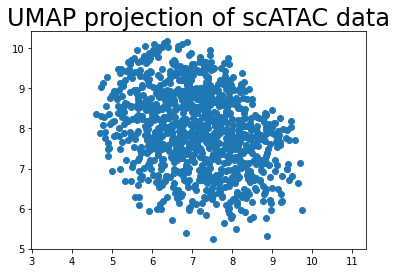

In [99]:
plt.scatter(embedding[:, 0],embedding[:, 1])
    #c=[sns.color_palette()[x] for x in df.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of scATAC data', fontsize=24)


In [115]:
import anndata

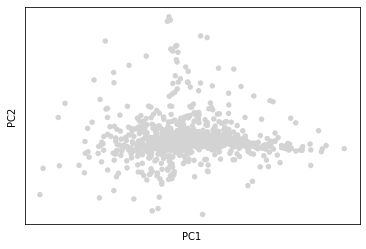

In [119]:
with open("./data/atac_data/matrix_atac.tsv") as your_data:
    adata = anndata.read_csv(your_data, delimiter='\t')

sc.tl.pca(adata)
sc.pl.pca(adata)
#sc.pl.pca(adata)

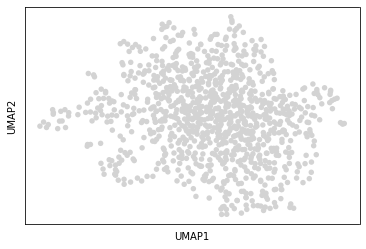

In [130]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=40)
sc.tl.umap(adata, spread=1.5, min_dist=.9, random_state=20)
sc.pl.umap(adata)

<AxesSubplot:>

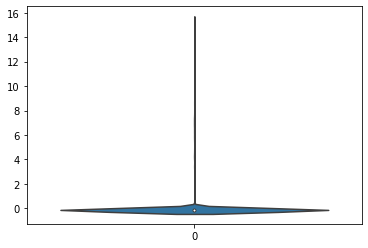

In [111]:
df.loc[56]
sns.violinplot(data=df.loc[56], jitter=0.4)

In [79]:
df.head(100)
#mapper = umap.UMAP().fit(df.values)
#umap.plot.points(mapper)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.349844,0.744676,-0.876536,-0.876536,0.563343,1.348053,1.230084,-0.876536,-0.876536,-0.876536,...,0.402362,0.384516,-0.876536,0.684424,-0.876536,-0.876536,-0.876536,1.309321,0.719594,1.211556
96,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,...,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289
97,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,...,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057
98,-0.667272,-0.667272,2.404169,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,...,-0.667272,0.799157,-0.667272,-0.667272,-0.667272,-0.667272,2.143346,-0.667272,-0.667272,-0.667272


<h1>Predict scRNAseq Pathway Scores from scATACseq data</h1>

<h4>Use pseudobulk scRNAseq?</h4>

In [226]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

In [259]:
sing = pd.read_csv('./data/sing_scores.tsv', sep='\t')

atac = atac_df.iloc[:, 1:]
#atac.describe()

#Predict Sing B_Cell score using ATAC matrix

In [262]:
sing.transpose().head(5)

,0,1,2,3,4,5,6,7,8,9,...,11554,11555,11556,11557,11558,11559,11560,11561,11562,11563
cell_ids,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACACTAAT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,...,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTCCACAAA-1,TTTGTTGGTCTTTATG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGCAGTA-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
Bcell_score,-0.071999,0.042124,0.047899,0.153889,-0.167156,0.139602,0.160736,0.165148,0.052274,0.039602,...,0.269337,-0.069307,0.264013,0.1398,0.047503,0.253775,0.053615,0.044638,0.047144,0.155944


In [217]:
#atac.tranpose().head(5)
#atac = atac.transpose()
atac2 = atac
atac2.head(5)


,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971


In [255]:
#Select a subsample of cells/barcodes to set as X (the predictor)
features = ['AAACAGCCAATCCCTT-1','AAACAGCCAATGCGCT-1', 'AAACAGCCACCAACCG-1', 'AAACAGCCAGGATAAC-1']

atac3 = atac2[features]

In [264]:
sing2 = sing.transpose()

atac3.loc[1001] = sing2
atac3

#atac4 = pd.concat([atac3, sing])

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1
0,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...
996,-0.171364,-0.171364,-0.171364,-0.171364
997,-0.066490,-0.066490,-0.066490,-0.066490
998,-0.048972,-0.048972,-0.048972,-0.048972
999,-0.175789,-0.175789,-0.175789,-0.175789


In [250]:
atac4 = atac3[100]

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,cell_ids,Bcell_score
0,-0.075744,-0.075744,-0.075744,-0.075744,NaN,NaN
1,-0.116420,-0.116420,-0.116420,-0.116420,NaN,NaN
2,-0.062548,-0.062548,-0.062548,-0.062548,NaN,NaN
3,-0.092238,-0.092238,-0.092238,-0.092238,NaN,NaN
4,-0.076971,-0.076971,-0.076971,-0.076971,NaN,NaN
...,...,...,...,...,...,...
11559,NaN,NaN,NaN,NaN,TTTGTTGGTGTTAAAC-1,0.253775
11560,NaN,NaN,NaN,NaN,TTTGTTGGTTAGGATT-1,0.053615
11561,NaN,NaN,NaN,NaN,TTTGTTGGTTGCAGTA-1,0.044638
11562,NaN,NaN,NaN,NaN,TTTGTTGGTTGGTTAG-1,0.047144


In [235]:
#X = atac2[features]
Y = sing.loc[features]

#X.describe()
#Y.describe()

KeyError: "None of [Index(['AAACAGCCAATCCCTT-1', 'AAACAGCCAATGCGCT-1', 'AAACAGCCACCAACCG-1',\n       'AAACAGCCAGGATAAC-1'],\n      dtype='object')] are in the [index]"

In [227]:

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.30, random_state = 40)
print(X_train.shape); print(X_test.shape)


ValueError: Found input variables with inconsistent numbers of samples: [1000, 11564]

In [ ]:
nn = MLPRegressor(max_iter=1000, activation='relu', hidden_layer_sizes= (8,8,8))

In [ ]:
nn.fit(X_train, Y_train)
nn_pred = nn.predict(X_test)
score = nn.score(X_test, Y_test)
#print(nn_pred)
print(score)


In [ ]:
Y_train